REGRESION LOGISTICA

Importación de paquetes y dataset

In [5]:

#INSTALAR
#! pip install sweetviz

import sweetviz as sv

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
#os.listdir()
%matplotlib inline

df_train = pd.read_csv('credit-train.csv')
df_test = pd.read_csv('credit-test.csv')
df_train


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


GENERO UN REPORTE EN HTML PARA VERLO Y REALIZAR LA TOMA DE DECISIONES SOBRE EL ALGORITMO.

In [6]:
analysis = sv.analyze(df_train)
analysis.show_html('credito.html')



                                             |          | [  0%]   00:00 -> (? left)

Report credito.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


VER DATOS DATAFRAME

In [7]:
print(df_test.shape)
print(df_test.columns)
print(df_test.head(2))
print(df_test.dtypes)


(4119, 20)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')
   age          job  marital    education default housing loan    contact  \
0   30  blue-collar  married     basic.9y      no     yes   no   cellular   
1   39     services   single  high.school      no      no   no  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         fri       487         2    999         0  nonexistent   
1   may         fri       346         4    999         0  nonexistent   

   emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  
0          -1.8          92.893          -46.2      1.313       5099.1  
1           1.1          93.994          -36.4      4.855       5191.0  
age                 int64
jo

VER SI HAY VALORES MISSING(Ya lo hemos visto en el reporte, pero lo verificamos)

In [8]:
total = df_train.isnull().sum()
percent = total/df_train.isnull().count()*100
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_values


,Total,Percent
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
month,0,0.0
day_of_week,0,0.0


ELIMINAR COLUMNAS SIN RELACIÓN(Ver en el reporte la matrix.
(Segun el reporte tienen impacto sobre la decisón de subscripción las columnas 'age', 'job','contact', 'month', 'duration', 'campaign', 'pdays','previous', 'poutcome', 'emp_var_rate', 'cons_price_idx','cons_conf_idx', 'euribor3m', 'nr_employed', 'y')

In [9]:
df_FOR_DUMMIES=df_train.drop(['marital', 'education', 'default', 'housing', 'loan','day_of_week'], axis=1)
df_DUMMIES=pd.get_dummies(data=df_FOR_DUMMIES, drop_first=True)
df_DUMMIES=df_DUMMIES.dropna()
df_DUMMIES



,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,0,0,0,1,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,1,0,0,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,...,0,0,1,0,0,0,0,0,1,0
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,0,0,0,0,1,0,0,0,1,0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,0,0,1,0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,...,0,0,0,0,0,0,1,0,1,0


RECOGER VARIABLES

In [10]:
explicativas=df_DUMMIES.drop(columns='y')
objetivo=df_DUMMIES.y


MODELO DE ÁRBOL DE DECISIÓN

[Text(0.5, 0.8333333333333334, 'nr_employed <= 5087.65\ngini = 0.2\nsamples = 41188\nvalue = [36548, 4640]'),
 Text(0.25, 0.5, 'duration <= 172.5\ngini = 0.494\nsamples = 4964\nvalue = [2755, 2209]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.287\nsamples = 1891\nvalue = [1563, 328]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.475\nsamples = 3073\nvalue = [1192, 1881]'),
 Text(0.75, 0.5, 'duration <= 606.5\ngini = 0.125\nsamples = 36224\nvalue = [33793, 2431]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.061\nsamples = 33232\nvalue = [32188, 1044]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.497\nsamples = 2992\nvalue = [1605, 1387]')]

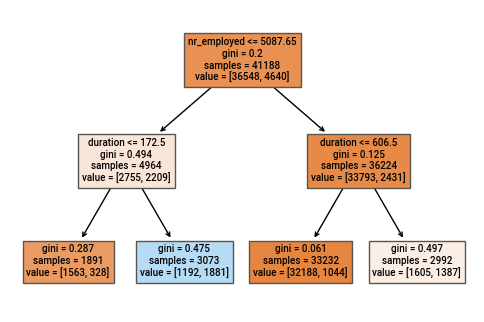

In [11]:
model = DecisionTreeClassifier(max_depth=2)

model.fit(X=explicativas, y=objetivo)
y_pred=model.predict(explicativas)
#VISUALIZAR
plot_tree(decision_tree=model,feature_names=explicativas.columns, filled=True,)

FIN MODELO ÁRBOL DE DECISIÓN

MODELO DE REGRESIÓN LOGISTICA

In [81]:
from sklearn.model_selection import train_test_split

X = explicativas
y = objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

from sklearn.linear_model import LogisticRegression
modelLogistic = LogisticRegression()
modelLogistic.fit(X_train,y_train)
predictions = modelLogistic.predict(X)
df_DUMMIES['predModeloRegresionLogistica'] = predictions
df_DUMMIES['scoreModeloRegresionLogistica'] = modelLogistic.score(X_test,y_test)*100
modelLogistic.score(X_test,y_test)
print(predictions)



[0 0 1 ... 0 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


FIN MODELO DE REGRESIÓN LOGISTICA

VER PREDICCIONES AL AZAR

In [71]:


df_DUMMIES['predModeloArbol'] = y_pred

def respuesta(response):
    if response==1:
        return "SUSCRIPCIÓN AL CRÉDITO"
    else:
        return "NO"

df_DUMMIES['predModeloArbol']=df_DUMMIES['predModeloArbol'].apply(respuesta) 
df_DUMMIES['y']=df_DUMMIES['y'].apply(respuesta) 


df_DUMMIES['predModeloRegresionLogistica']=df_DUMMIES['predModeloRegresionLogistica'].apply(respuesta) 

df_DUMMIES.sample(100)[['y','predModeloArbol','predModeloRegresionLogistica']]



,y,predModeloArbol,predModeloRegresionLogistica
31236,NO,NO,NO
26372,NO,NO,NO
25050,NO,NO,NO
34562,NO,NO,NO
15249,NO,NO,NO
...,...,...,...
10866,NO,NO,NO
15985,NO,NO,NO
33914,NO,NO,NO
22020,NO,NO,NO


ACIERTOS DEL MODELO DE ARBOL

In [80]:
print("TOTAL ELEMENTOS")
print(df_DUMMIES['y'].count())
print("ACIERTOS DE LA PREDICCIÓN")
print((df_DUMMIES['y']==df_DUMMIES['predModeloArbol']).sum())
print("PORCENTAGE DE ACIERTO DE LA PREDICCIÓN")
print((df_DUMMIES['y']==df_DUMMIES['predModeloArbol']).sum()/df_DUMMIES['y'].count())



print("ACIERTOS DE LA PREDICCIÓN")
print((df_DUMMIES['y']==df_DUMMIES['predModeloRegresionLogistica']).sum())
print("PORCENTAGE DE ACIERTO DE LA PREDICCIÓN")
print((df_DUMMIES['y']==df_DUMMIES['predModeloRegresionLogistica']).sum()/df_DUMMIES['y'].count())

df_DUMMIES['scoreModeloArbol']=(df_DUMMIES['y']==df_DUMMIES['predModeloRegresionLogistica']).sum()/df_DUMMIES['y'].count()*100


TOTAL ELEMENTOS
41188
ACIERTOS DE LA PREDICCIÓN
38115
PORCENTAGE DE ACIERTO DE LA PREDICCIÓN
0.9253908905506458
ACIERTOS DE LA PREDICCIÓN
38185
PORCENTAGE DE ACIERTO DE LA PREDICCIÓN
0.9270904146838885


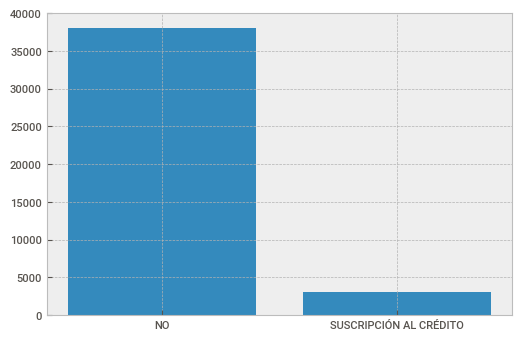

In [19]:
plt.style.use("bmh")         

fig, ax = plt.subplots()        

plt.plot()   

x_values = df_DUMMIES['predModeloArbol'].unique()
y_values = df_DUMMIES['predModeloArbol'].value_counts().tolist()
plt.bar(x_values, y_values)
plt.show()


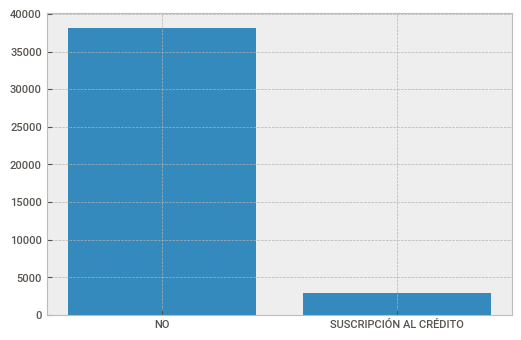

In [72]:
plt.style.use("bmh")         

fig, ax = plt.subplots()        

plt.plot()   

x_values = df_DUMMIES['predModeloRegresionLogistica'].unique()
y_values = df_DUMMIES['predModeloRegresionLogistica'].value_counts().tolist()
plt.bar(x_values, y_values)
plt.show()